## Import Libraries

In [1]:
# Library to support working with data
import pandas as pd
import numpy as np

# Data Normalization Support Library
from sklearn.preprocessing import MinMaxScaler

# Performance metrics calculation support library
from sklearn.metrics import r2_score, explained_variance_score, mean_squared_error, mean_absolute_percentage_error, mean_absolute_error, mean_squared_log_error

# Graphing support library
from matplotlib import ticker
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("ABBV-AbbVie.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-03-01,79.769997,80.849998,79.279999,80.099998,62.999912,8567900
1,2019-03-04,80.400002,80.730003,79.110001,79.459999,62.496529,5872500
2,2019-03-05,79.379997,79.900002,78.720001,78.910004,62.063969,5933100
3,2019-03-06,79.129997,79.129997,77.559998,78.089996,61.419025,5293200
4,2019-03-07,77.769997,79.120003,77.440002,78.239998,61.537003,6642500
...,...,...,...,...,...,...,...
1254,2024-02-23,177.259995,178.910004,177.009995,178.089996,176.442200,3941800
1255,2024-02-26,178.839996,179.789993,178.000000,178.809998,177.155533,4327400
1256,2024-02-27,178.770004,179.529999,176.979996,178.990005,177.333878,3888500
1257,2024-02-28,179.850006,179.889999,176.889999,178.000000,176.353043,4331300


## Reset index

In [3]:
# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Set the 'Date' column as the index value
df.set_index('Date', inplace=True)

In [4]:
# Select the Close column as the dependent variable
df_Close = df[['Close']]
df_Close = df_Close.reset_index(drop=True)

## Data normalization

In [5]:
# Min-max normalization
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(np.array(df_Close))

## Data splitting

In [6]:
# Split the data into training, validation and test dataset in a ratio of 6:2:2
train_size = int(0.6 * len(data_scaled))
val_size = int(0.2 * len(data_scaled))
test_size = len(data_scaled) - train_size - val_size

train_data = data_scaled[: train_size]
val_data = data_scaled[train_size : train_size + val_size]
test_data = data_scaled[train_size + val_size :]

## Model training and testing

In [7]:
pip install blosc2~=2.0.0

Note: you may need to restart the kernel to use updated packages.


In [8]:
# Install library pmdarima
!pip install pmdarima

## Training process

In [9]:
# Preparing training data
x_train = np.arange(train_size).reshape(-1, 1)
y_train = train_data.reshape(-1)

In [10]:
# Find the best ARIMA model using auto_arima
from pmdarima.arima import auto_arima
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-4358.360, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-4360.717, Time=0.15 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-4361.498, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-4361.192, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-4360.071, Time=0.09 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-4361.581, Time=0.09 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-4360.219, Time=0.22 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-4360.178, Time=0.11 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-4360.291, Time=0.22 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-4358.230, Time=0.36 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=-4360.919, Time=0.13 sec

Best model:  ARIMA(2,1,0)(0,0,0)[0] intercept
Total fit time: 1.653 seconds


In [11]:
# Fit the model
model.fit(y_train)

ARIMA(order=(2, 1, 0), scoring_args={}, suppress_warnings=True)

## Validate Processing

In [12]:
# Preparing validation data
x_val = np.array(range(train_size, train_size + val_size)).reshape(-1, 1)
y_val = np.array(val_data).reshape(-1)
y_pred_val = model.predict(n_periods = len(y_val))

## Testing Processing

In [13]:
x_test = np.array(range(test_size, train_size + val_size + test_size)).reshape(-1, 1)
y_test = np.array(test_data).reshape(-1)
y_pred = model.predict(n_periods=len(y_test))

## Evaluate Model

In [14]:
# Evaluate the accuracy of validation
y_val = scaler.inverse_transform(np.array([y_val]).reshape(-1, 1))
y_pred_val = scaler.inverse_transform(np.array([y_pred_val]).reshape(-1, 1))

val_mape = mean_absolute_percentage_error(y_val, y_pred_val)
val_mse = mean_squared_error(y_val, y_pred_val)
val_rmse = np.sqrt(val_mse)
val_msle = mean_squared_log_error(y_val, y_pred_val)

print(f"MAPE on Validate set: ", val_mape)
print(f"RMSE on Validate set: ", val_rmse)
print(f"MSLE on Validate set: ", val_msle)

MAPE on Validate set:  0.0864098050000376
RMSE on Validate set:  14.96702220082573
MSLE on Validate set:  0.009293710866569112


In [15]:
# Evaluate the accuracy of test
y_test = scaler.inverse_transform(np.array([y_test]).reshape(-1, 1))
y_pred = scaler.inverse_transform(np.array([y_pred]).reshape(-1, 1))

test_mape = mean_absolute_percentage_error(y_test, y_pred)
test_mse = mean_squared_error(y_test, y_pred)
test_rmse = np.sqrt(test_mse)
test_msle = mean_squared_log_error(y_test, y_pred)

print(f"MAPE on Test dataset: ", test_mape)
print(f"RMSE on Test dataset: ", test_rmse)
print(f"MSLE on Test dataset: ", test_msle)

MAPE on Test dataset:  0.08801744459438887
RMSE on Test dataset:  14.736567047331048
MSLE on Test dataset:  0.00928796067107964


# Predicting the next 30 days

## Preparing the prediction data

In [16]:
# The process of creating index predict next 30 days
last_index =  df_Close.index[-1]

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index + 1, last_index + 31)).reshape(-1, 1)

## Prediction process

In [17]:
# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(n_periods=len(x_next_30_days))
y_next_30_days = scaler.inverse_transform(np.array([y_next_30_days]).reshape(-1, 1))

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days.flatten())

Predicted closing prices for the next 30 days:
[149.3043412  149.63563125 149.69570727 149.80155215 149.89039335
 149.98264455 150.07379822 150.16519609 150.25652171 150.34786446
 150.43920238 150.53054149 150.62188028 150.71321915 150.804558
 150.89589685 150.9872357  151.07857455 151.1699134  151.26125226
 151.35259111 151.44392996 151.53526881 151.62660766 151.71794651
 151.80928537 151.90062422 151.99196307 152.08330192 152.17464077]


## Preparing the forecast date index

In [18]:
# Get the last date from the current index
last_date = df.index[-1]

# Add one day to the last date
next_date = last_date + pd.DateOffset(days=1)

# Create a list of indices starting from the next date for 30 days
index_next_30_days = pd.date_range(start=next_date, periods=30).tolist()

## Visualization

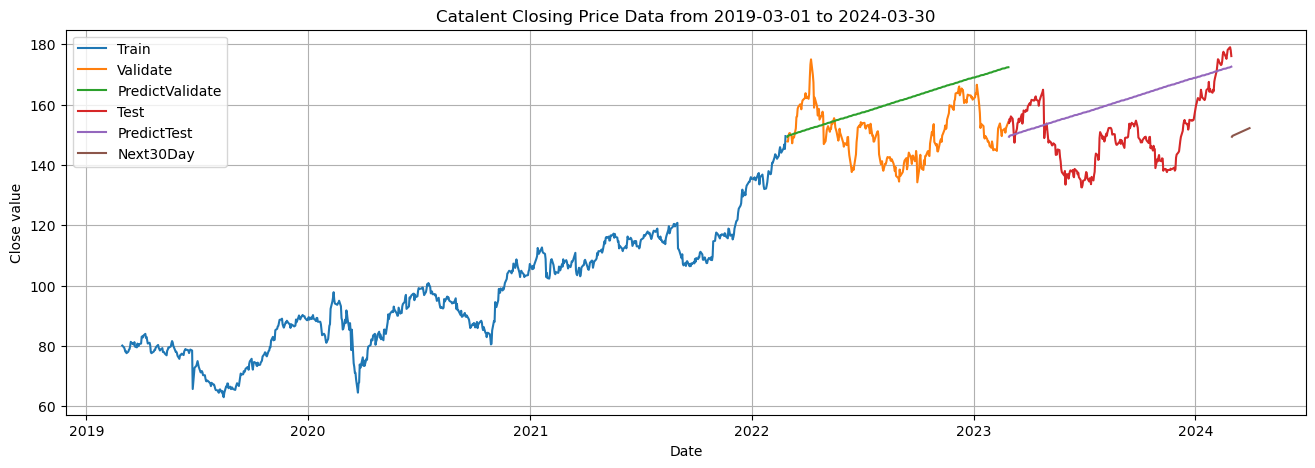

In [19]:
# Drawing
plt.figure(figsize=(16, 5))

plt.plot(df.index[:train_size], scaler.inverse_transform(np.array([y_train]).reshape(-1, 1)))

plt.plot(df.index[train_size : train_size + val_size], y_val)

plt.plot(df.index[train_size : train_size + val_size], y_pred_val)

plt.plot(df.index[train_size + val_size :], y_test)

plt.plot(df.index[train_size + val_size :], y_pred)

plt.plot(index_next_30_days, y_next_30_days)

plt.legend(['Train', 'Validate', 'PredictValidate', 'Test', 'PredictTest', 'Next30Day'])

plt.grid()
plt.title(f"Catalent Closing Price Data from {df.index[0].strftime('%Y-%m-%d')} to {index_next_30_days[-1].strftime('%Y-%m-%d')}")
plt.xlabel("Date")
plt.ylabel("Close value")
plt.savefig('image/ARIMA_622_30day_ABBV.png')
plt.show()